In [1]:
from __future__ import unicode_literals, print_function, division
import torch
import torch.nn as nn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.insert(0, '../preprocessing/') #need this in order to get to the other file in other directory

#can comment out the ones you aren't using to save a little bit of time
from covidPreprocess import getCoronaVocabulary, getCoronaText
from liarPreprocess import getLiarVocabulary, getLiarText
from fnnPreprocess import getFNNVocabulary, getFNNText

In [2]:
def getVocabulary(dataset: str):
    '''
    gets around 63-71% for corona and Liar datasets, around 80-83% on FNN
    
    used this article for help in writing the tensor parts of code so it works with the model
    https://medium.com/analytics-vidhya/part-1-sentiment-analysis-in-pytorch-82b35edb40b8
    '''
    DEBUG_MODE = False

    torch.manual_seed(1)
    if dataset == 'corona':
        X,Y = getCoronaText() #this function will give us the text array (not document term matrix) and Y
        X_train,Y_train, vectorizer_train = getCoronaVocabulary(True)
    elif dataset == 'liar':
        X,Y = getLiarText()
        X_train,Y_train, vectorizer_train = getLiarVocabulary(True)
    elif dataset == 'fnn':
        X,Y = getFNNText()
        X_train,Y_train, vectorizer_train = getFNNVocabulary(True)
    
    #transform our testing dataset to match the vocabulary for the training dataset
    #transform will return the document-term matrix for X based on training dataset
    x_test = vectorizer_train.transform(X)
    
    return x_test, Y, X_train, Y_train, vectorizer_train

def logisticClassifyData(x_test, Y, X_train, Y_train, vectorizer_train, mIter = None):
    #sample test on logistic classifier
    if (mIter == None):
        classifier = LogisticRegression()
    else:
        classifier = LogisticRegression(max_iter = mIter)
    classifier.fit(X_train,Y_train)
    train_accuracy = classifier.score(X_train,Y_train)
    test_accuracy = classifier.score(x_test,Y)

    print("train accuracy: {:.4f}%".format(train_accuracy * 100))
    print("test accuracy: {:.4f}%".format(test_accuracy * 100))
    print("difference in accuracies: {:.4f}%".format(abs(test_accuracy - train_accuracy) * 100))
    return train_accuracy, test_accuracy

In [29]:
x_test, Y, X_train, Y_train, vectorizer_train = getVocabulary("corona")
testMaxIter = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
trCovid = []
teCovid = []
for i in testMaxIter:
    print("Testing max_iter =", i)
    tr, te = logisticClassifyData(x_test, Y, X_train, Y_train, vectorizer_train, i)
    trCovid.append(tr*100)
    teCovid.append(te*100)

Testing max_iter = 100
train accuracy: 100.0000%
test accuracy: 87.3998%
difference in accuracies: 12.6002%
Testing max_iter = 200
train accuracy: 100.0000%
test accuracy: 87.3998%
difference in accuracies: 12.6002%
Testing max_iter = 300
train accuracy: 100.0000%
test accuracy: 87.3998%
difference in accuracies: 12.6002%
Testing max_iter = 400
train accuracy: 100.0000%
test accuracy: 87.3998%
difference in accuracies: 12.6002%
Testing max_iter = 500
train accuracy: 100.0000%
test accuracy: 87.3998%
difference in accuracies: 12.6002%
Testing max_iter = 600
train accuracy: 100.0000%
test accuracy: 87.3998%
difference in accuracies: 12.6002%
Testing max_iter = 700
train accuracy: 100.0000%
test accuracy: 87.3998%
difference in accuracies: 12.6002%
Testing max_iter = 800
train accuracy: 100.0000%
test accuracy: 87.3998%
difference in accuracies: 12.6002%
Testing max_iter = 900
train accuracy: 100.0000%
test accuracy: 87.3998%
difference in accuracies: 12.6002%
Testing max_iter = 1000
trai

In [30]:
x_testL, YL, X_trainL, Y_trainL, vectorizer_trainL = getVocabulary("liar")


Extracting tokens....

Extracting tokens....
Data shape for text:  (15052, 4893)


In [32]:
testMaxIter = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
trLiar = []
teLiar = []
for i in testMaxIter:
    print("Testing max_iter =", i)
    tr, te = logisticClassifyData(x_testL, YL, X_trainL, Y_trainL, vectorizer_trainL, i)
    trLiar.append(tr*100)
    teLiar.append(te*100)

Testing max_iter = 100


C:\Users\Mia Markovic\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 89.5097%
test accuracy: 64.8499%
difference in accuracies: 24.6598%
Testing max_iter = 200


C:\Users\Mia Markovic\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 90.9713%
test accuracy: 64.2970%
difference in accuracies: 26.6743%
Testing max_iter = 300


C:\Users\Mia Markovic\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 91.3168%
test accuracy: 64.3760%
difference in accuracies: 26.9408%
Testing max_iter = 400


C:\Users\Mia Markovic\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 91.3898%
test accuracy: 64.6919%
difference in accuracies: 26.6979%
Testing max_iter = 500


C:\Users\Mia Markovic\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 91.3965%
test accuracy: 64.6919%
difference in accuracies: 26.7045%
Testing max_iter = 600


C:\Users\Mia Markovic\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 91.3301%
test accuracy: 64.7709%
difference in accuracies: 26.5591%
Testing max_iter = 700


C:\Users\Mia Markovic\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 91.3898%
test accuracy: 64.8499%
difference in accuracies: 26.5399%
Testing max_iter = 800


C:\Users\Mia Markovic\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 91.3832%
test accuracy: 64.8499%
difference in accuracies: 26.5333%
Testing max_iter = 900


C:\Users\Mia Markovic\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 91.3898%
test accuracy: 64.8499%
difference in accuracies: 26.5399%
Testing max_iter = 1000
train accuracy: 91.3898%
test accuracy: 64.7709%
difference in accuracies: 26.6189%


C:\Users\Mia Markovic\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
x_testF, YF, X_trainF, Y_trainF, vectorizer_trainF = getVocabulary("fnn")


Extracting tokens....

Extracting tokens....
Data shape for text:  (15212, 4975)


In [41]:
trFnn = []
teFnn = []
for i in testMaxIter:
    print("Testing max_iter =", i)
    tr, te = logisticClassifyData(x_testF, YF, X_trainF, Y_trainF, vectorizer_trainF, i)
    trFnn.append(tr*100)
    teFnn.append(te*100)

Testing max_iter = 100


C:\Users\Mia Markovic\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 86.8591%
test accuracy: 81.0247%
difference in accuracies: 5.8344%
Testing max_iter = 200


C:\Users\Mia Markovic\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 88.6537%
test accuracy: 78.0835%
difference in accuracies: 10.5702%
Testing max_iter = 300


C:\Users\Mia Markovic\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 88.8903%
test accuracy: 76.8501%
difference in accuracies: 12.0403%
Testing max_iter = 400


C:\Users\Mia Markovic\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 89.0613%
test accuracy: 77.0398%
difference in accuracies: 12.0214%
Testing max_iter = 500


C:\Users\Mia Markovic\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 89.0810%
test accuracy: 76.7552%
difference in accuracies: 12.3258%
Testing max_iter = 600


C:\Users\Mia Markovic\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 89.0415%
test accuracy: 76.8501%
difference in accuracies: 12.1915%
Testing max_iter = 700


C:\Users\Mia Markovic\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 89.0613%
test accuracy: 76.8501%
difference in accuracies: 12.2112%
Testing max_iter = 800


C:\Users\Mia Markovic\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 89.0678%
test accuracy: 76.8501%
difference in accuracies: 12.2177%
Testing max_iter = 900


C:\Users\Mia Markovic\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 89.0744%
test accuracy: 76.9450%
difference in accuracies: 12.1294%
Testing max_iter = 1000
train accuracy: 89.0613%
test accuracy: 76.8501%
difference in accuracies: 12.2112%


C:\Users\Mia Markovic\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


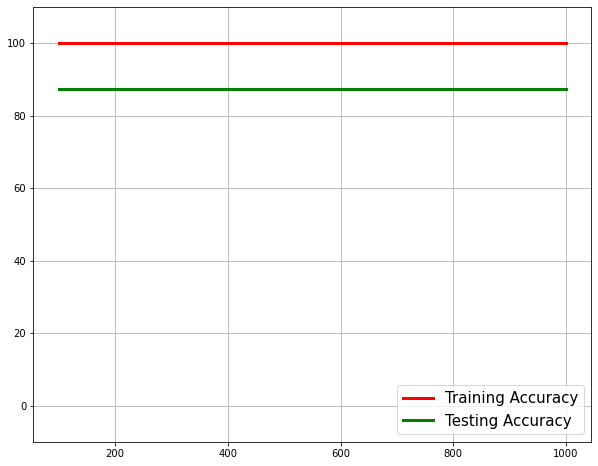

In [48]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.set_ylim(-10,110)

plt.plot(testMaxIter, trCovid, lw=3, color='red', label='Training Accuracy')
plt.plot(testMaxIter, teCovid, lw=3, color='green', label='Testing Accuracy')

ax.legend(fontsize=15, loc=4)
plt.grid()
plt.show()

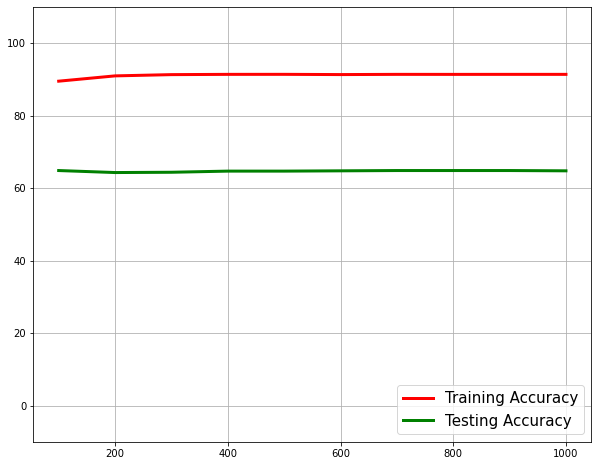

In [49]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.set_ylim(-10,110)

plt.plot(testMaxIter, trLiar, lw=3, color='red', label='Training Accuracy')
plt.plot(testMaxIter, teLiar, lw=3, color='green', label='Testing Accuracy')

ax.legend(fontsize=15, loc=4)
plt.grid()
plt.show()

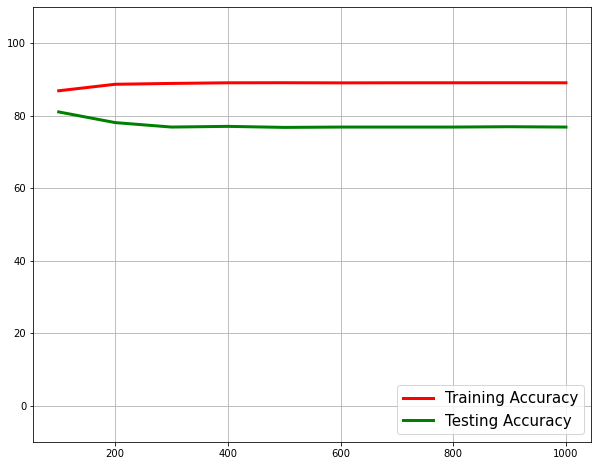

In [50]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.set_ylim(-10,110)

plt.plot(testMaxIter, trFnn, lw=3, color='red', label='Training Accuracy')
plt.plot(testMaxIter, teFnn, lw=3, color='green', label='Testing Accuracy')

ax.legend(fontsize=15, loc=4)
plt.grid()
plt.show()